In [55]:
#downloading dataset, importing libraries
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

In [56]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('Wholesale customers data.csv')

df.head()

df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [57]:
#printing columns list
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [58]:
# NO encoding performed as columns are already numeric
#selecting features
# channel and region columns not selected in selected features
selected_features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
display(selected_features)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [59]:
# defining x
x_columns = 6

#x = selected_features
x = selected_features.iloc[:, 0:x_columns].values

In [60]:
#implementing Elbow method in Python
elbow = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df)
    elbow.append(kmeanModel.inertia_)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

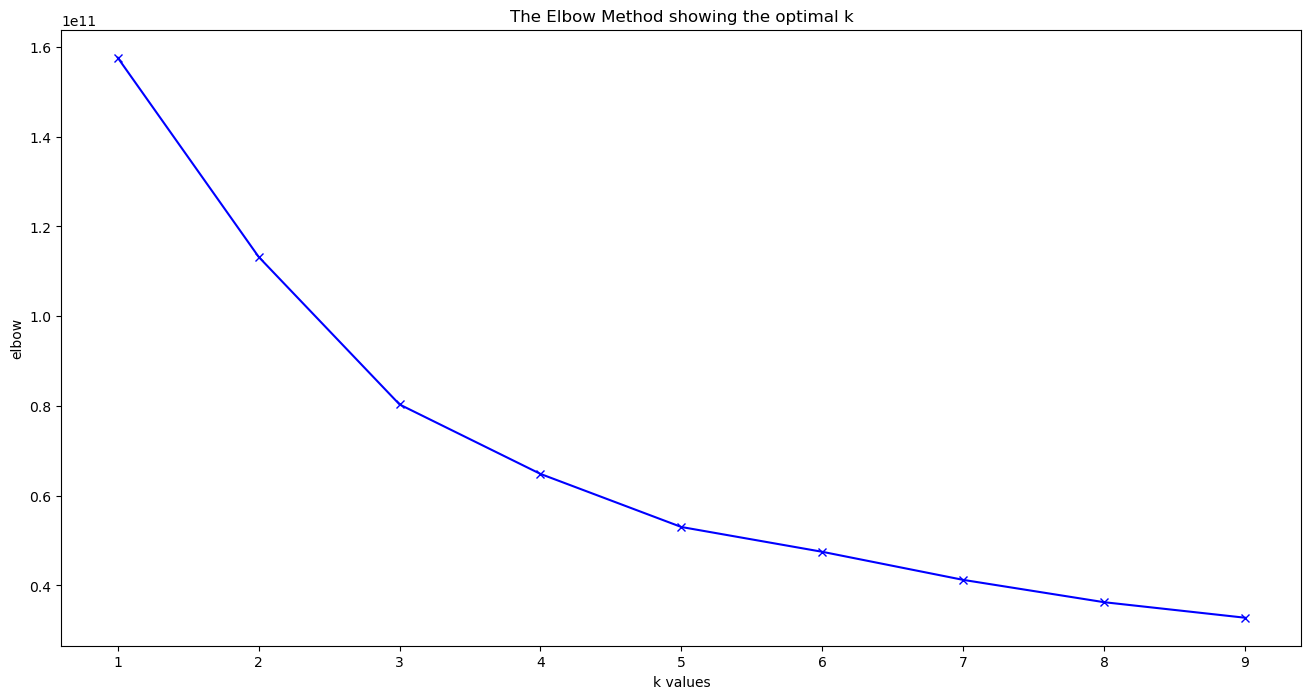

In [61]:
#plotting Elbow method vs values of K
plt.figure(figsize = (16,8))
plt.plot(K, elbow, 'bx-')
plt.xlabel('k values')
plt.ylabel ('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [62]:
#observation
print ("We can observe that the 'elbow' is the number 2 which is optimal value of k")
print("Now we can use K-Means using n_clusters as number 2")

We can observe that the 'elbow' is the number 2 which is optimal value of k
Now we can use K-Means using n_clusters as number 2


In [63]:
#defining a KMEANS model with 2 clusters
model = KMeans(n_clusters =2, random_state = 0)
model.fit(x)  

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [64]:
#scaling and preprocessing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)


In [65]:
#defining clusters for model
clusters = model.predict(X)


In [66]:
#printing model inertia
model.inertia_

113217528520.90988

In [67]:
# trying a different optimal value of k, i.e k = 3
model1 = KMeans(n_clusters =3, random_state = 0)
model1.fit(x)  

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [68]:
#printing model1 inertia
model1.inertia_

80332413843.01634

In [69]:
# printing first 10 data samples for model
y = model.fit_predict(x)
print(y[0:10])

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 0 1 1 1 1 1]


In [70]:
# printing first 10 data samples for model1
y1 = model1.fit_predict(x)
print(y1[0:10])

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 1 0 0 0 0 2]


In [71]:
#defining centres for model
centres = model.cluster_centers_
print(centres)

[[35401.36923077  9514.23076923 10346.36923077  6463.09230769
   2933.04615385  3316.84615385]
 [ 7944.112       5151.81866667  7536.128       2484.13066667
   2872.55733333  1214.26133333]]


Text(0, 0.5, 'Frozen')

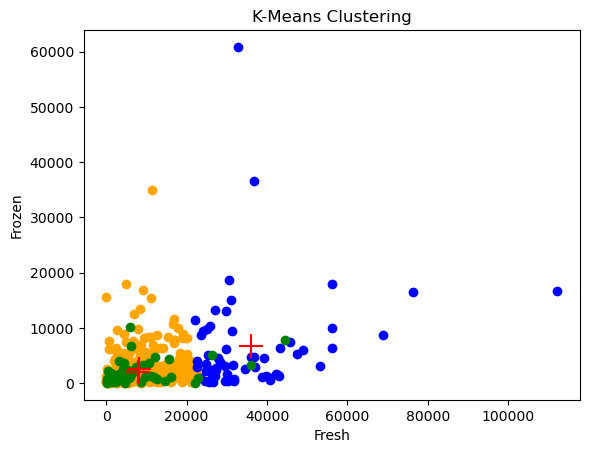

In [72]:
#plotting KMeans cluster between FRESH and FROZEN columns
import matplotlib.pyplot as plt
colors = ['orange', 'blue', 'green']
for i in range(3):
    plt.scatter(x[y1 == i, 0], x[y1 == i, 3], c=colors[i])
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 3], color='red', marker='+', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Fresh')
plt.ylabel('Frozen')

Text(0, 0.5, 'Detergent')

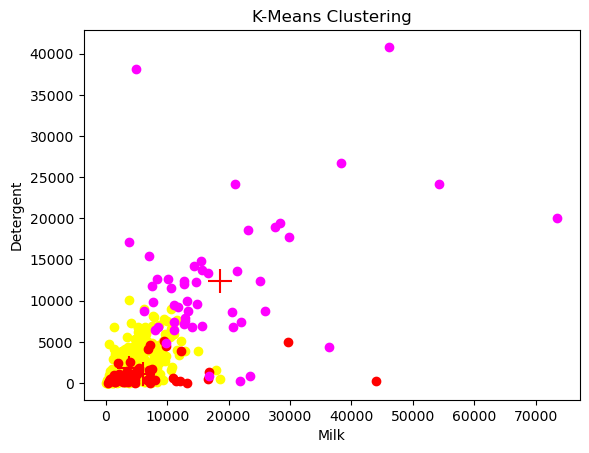

In [73]:
#plotting KMeans cluster between MILK and DETERGENT columns
import matplotlib.pyplot as plt
colors = ['yellow', 'red', 'magenta']
for i in range(3):
    plt.scatter(x[y1 == i, 1], x[y1 == i, 4], c=colors[i])
plt.scatter(model1.cluster_centers_[:, 1], model1.cluster_centers_[:, 4], color='red', marker='+', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Milk')
plt.ylabel('Detergent')

In [74]:
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

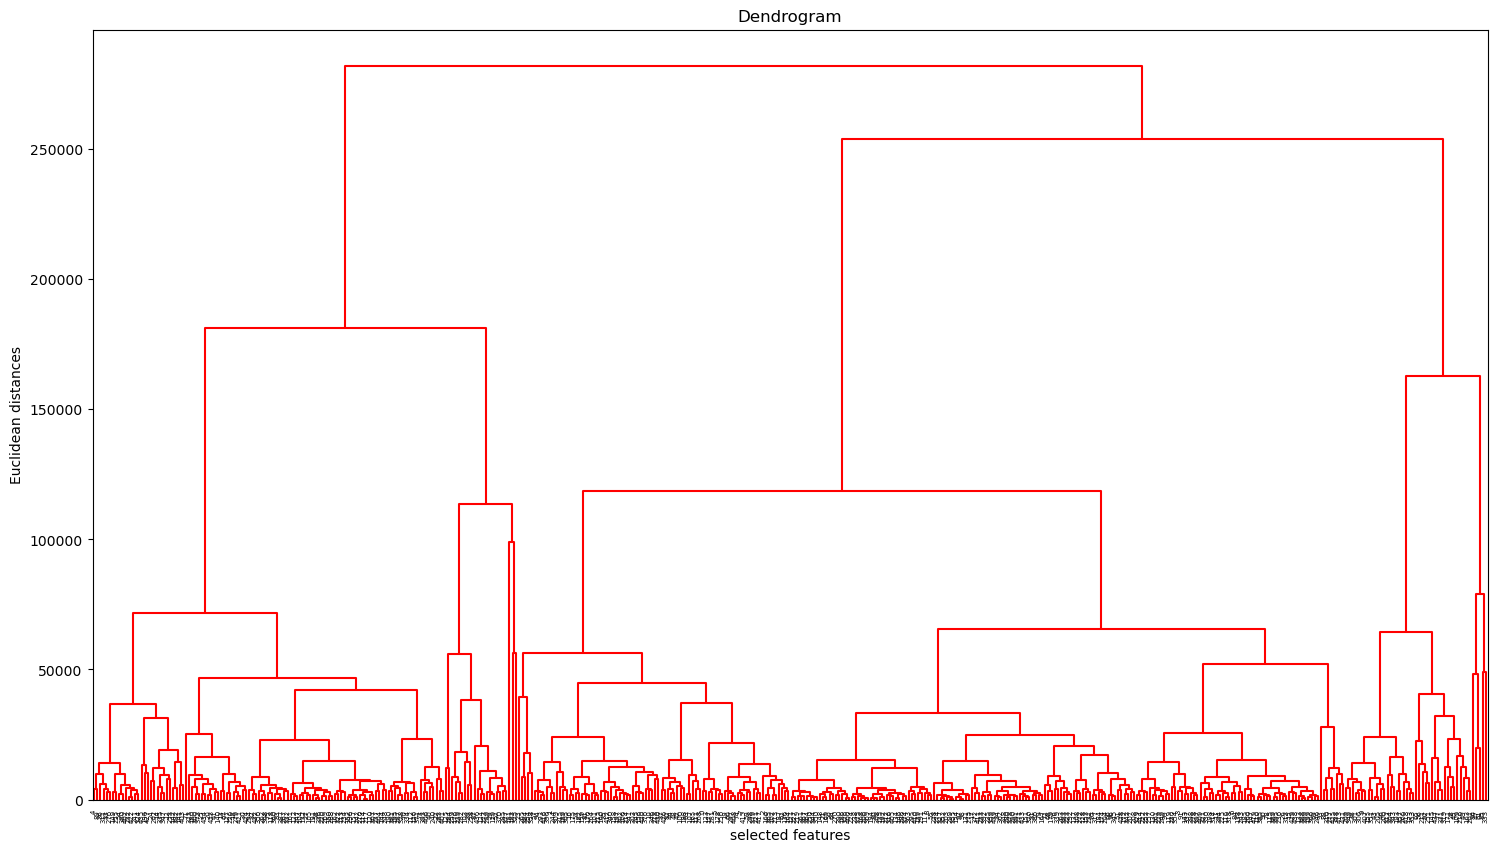

In [75]:
#HIERARCHICAL clustering part of Agglomerative clustering:

# down loading Scipy library
import scipy.cluster.hierarchy as sch

# generating Agglomerative Clustering, (i.e. a Dendogram)
from sklearn.cluster import AgglomerativeClustering

#SciPy Dendogram (structuring
plt.figure(figsize=(18,10))
plt.title('Dendrogram')
plt.xlabel('selected features')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'),
                            color_threshold=200, 
                            above_threshold_color='red') 
plt.show()



C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


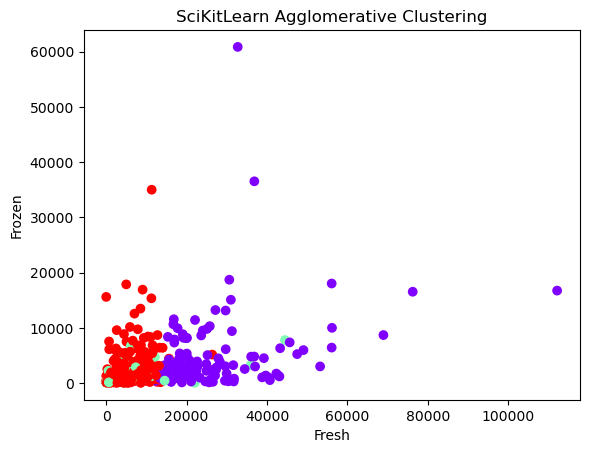

In [76]:
# SciKitLearn HIERARCHICAL clustering part of Agglomerative clustering -WITH 3 clusters
modelHC = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean',
                                 linkage ='ward')
yHC = modelHC.fit_predict(x)

plt.scatter(x[:, 0], x[:, 3], c=yHC, cmap="rainbow")
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title("SciKitLearn Agglomerative Clustering")
plt.show()

In [77]:
# printing first 10 samples with 3 clusters
print(yHC[0:10])

[2 2 2 2 0 2 2 2 2 1]


C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


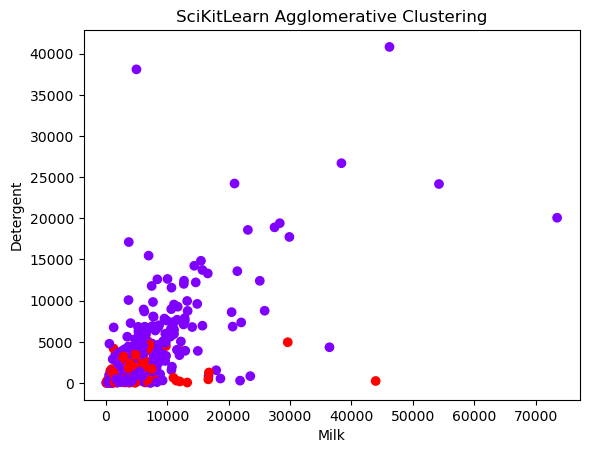

In [78]:
# SciKitLearn HIERARCHICAL clustering part of Agglomerative clustering -WITH 2 clusters
modelHC1 = AgglomerativeClustering(n_clusters = 2, affinity ='euclidean',
                                 linkage ='ward')
yHC1 = modelHC1.fit_predict(x)

plt.scatter(x[:, 1], x[:, 4], c=yHC1, cmap="rainbow")
plt.xlabel('Milk')
plt.ylabel('Detergent')
plt.title("SciKitLearn Agglomerative Clustering")
plt.show()

In [79]:
# printing first 10 samples with 2 clusters
print(yHC1[0:10])

[0 0 0 0 1 0 0 0 0 0]
